In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("cleaned_data.csv")

In [4]:
data.shape

(71515, 101)

In [5]:
data.shape

(71515, 101)

In [6]:
data.head(5).T

,0,1,2,3,4
gender,1,1,1,0,0
age,0,0,0,1,1
time_in_hospital,0,0,0,0,0
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
...,...,...,...,...,...
discharge_disposition_id_28,0,0,0,0,0
race_Asian,0,0,0,0,0
race_Caucasian,1,1,0,1,1
race_Hispanic,0,0,0,0,0


In [7]:
data.shape

(71515, 101)

In [8]:
data.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin',
       ...
       'discharge_disposition_id_7', 'discharge_disposition_id_9',
       'discharge_disposition_id_10', 'discharge_disposition_id_13',
       'discharge_disposition_id_18', 'discharge_disposition_id_28',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other'],
      dtype='object', length=101)

In [9]:
data.shape

(71515, 101)

In [10]:
df = data.copy()

In [11]:
df.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin',
       ...
       'discharge_disposition_id_7', 'discharge_disposition_id_9',
       'discharge_disposition_id_10', 'discharge_disposition_id_13',
       'discharge_disposition_id_18', 'discharge_disposition_id_28',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other'],
      dtype='object', length=101)

In [12]:
from sklearn.preprocessing import StandardScaler
X = df.drop(["readmitted"],axis = 1)
Y = df["readmitted"]

X_std = StandardScaler().fit_transform(X)

Cov_matrix = np.cov(X_std.T)
print("Covariance Matrix \n",Cov_matrix)

Covariance Matrix 
 [[ 1.00001398  0.06195913  0.01999272 ... -0.05657268  0.00105039
  -0.01241269]
 [ 0.06195913  1.00001398  0.11611181 ...  0.15901972 -0.06051085
  -0.01449508]
 [ 0.01999272  0.11611181  1.00001398 ...  0.00225365 -0.01697801
  -0.00513556]
 ...
 [-0.05657268  0.15901972  0.00225365 ...  1.00001398 -0.25361259
  -0.36813252]
 [ 0.00105039 -0.06051085 -0.01697801 ... -0.25361259  1.00001398
  -0.0314586 ]
 [-0.01241269 -0.01449508 -0.00513556 ... -0.36813252 -0.0314586
   1.00001398]]


In [13]:
X_std_df = pd.DataFrame(X_std,columns = X.columns)
X_std_df.head().T

,0,1,2,3,4
gender,0.938476,0.938476,0.938476,-1.065558,-1.065558
age,-2.424677,-2.424677,-2.424677,-1.099429,-1.099429
time_in_hospital,-0.827997,-0.827997,-0.827997,-0.827997,-0.827997
num_lab_procedures,-0.104043,0.798122,-1.607650,0.046318,0.397160
num_procedures,-0.812874,-0.812874,2.028300,-0.244639,-0.812874
...,...,...,...,...,...
discharge_disposition_id_28,-0.035497,-0.035497,-0.035497,-0.035497,-0.035497
race_Asian,-0.083655,-0.083655,-0.083655,-0.083655,-0.083655
race_Caucasian,0.580477,0.580477,-1.722720,0.580477,0.580477
race_Hispanic,-0.147214,-0.147214,-0.147214,-0.147214,-0.147214


In [14]:
eig_vals,eig_vecs = np.linalg.eig(Cov_matrix)

In [15]:
print("Eigen values \n%s",eig_vals)
print("Eigen_vectors \n%s",eig_vecs)

Eigen values 
%s [3.38518198 2.5772883  2.45788382 2.16631593 2.0630671  0.01410117
 1.90286551 0.03320623 0.03623059 0.07594421 0.17213582 1.67582314
 0.26959459 1.61286945 0.33261568 0.35746999 0.39156618 1.50621753
 1.47589411 0.45818489 0.46412521 1.42816373 0.52121981 1.42359991
 0.54588667 0.55874534 0.59482284 1.3779424  1.31989581 1.30717646
 0.64491562 0.68793801 1.24102365 0.69790602 1.2197496  0.73122156
 0.73604152 0.74873594 1.18592083 1.17036056 0.75405073 0.7701945
 0.79975013 0.81302517 0.81885165 0.8306661  1.13287426 1.12687903
 0.8488816  1.1196117  0.85984803 0.86350359 1.09905914 0.88017723
 0.88335468 1.09014911 0.89804207 1.07685202 1.07298725 1.06571245
 0.91105131 0.9171917  0.92504632 0.93340981 1.05412294 0.94433936
 1.04414357 0.94933317 0.95308709 1.04214809 1.03113818 1.03284742
 1.03351104 0.96166776 0.96315128 1.0269225  0.96989996 1.02204223
 1.01792085 0.97717648 0.96832666 0.96865271 0.98066331 0.98387771
 0.98745386 1.01332818 1.01081233 1.00893255 0

In [16]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [17]:
tot = sum(eig_vals)
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [  3.41932792   6.02261304   8.50528925  10.69345656  12.77733358
  14.69939308  16.39212006  18.02125834  19.54266891  21.0334502
  22.47601966  23.91397926  25.3058208   26.63903025  27.95939205
  29.21293377  30.44498684  31.64286991  32.82503577  33.9693372
  35.10758294  36.23848804  37.34863326  38.44977858  39.53749269
  40.62130304  41.69776521  42.76252096  43.81719669  44.86985681
  45.91379275  46.95705839  47.99859754  49.03587848  50.06822993
  51.09641844  52.11996795  53.14097623  54.16008577  55.17529599
  56.18956202  57.20287004  58.21520981  59.22600637  60.23505318
  61.24335886  62.25102529  63.25785054  64.26255466  65.26585757
  66.26327177  67.25707375  68.2476289   69.23466205  70.21434527
  71.19276867  72.17086273  73.1437292   74.11509719  75.07779796
  76.03670695  76.99057175  77.93339675  78.86777391  79.79421721
  80.71445819  81.62155871  82.51382369  83.40287917  84.27509282
  85.14361404  86.00105821  86.84010315  87.6672

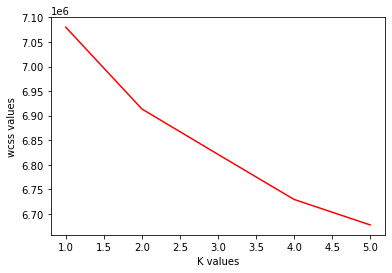

In [18]:
# TO find best K value
wcss = []

for i in range (1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_std_df)
    wcss.append(kmeans.inertia_)
    
#visualization of K values

plot.plot(range(1,6),wcss, color = "red")
plot.title = ("Graph of K values and wcss")
plot.xlabel("K values")
plot.ylabel("wcss values")
plot.show()

In [19]:
df.readmitted.value_counts()

0    42982
1    22240
2     6293
Name: readmitted, dtype: int64

In [20]:
# KMeans clustering
kmeans = KMeans(n_clusters = 3,random_state = 1)

# Training the model
clusters = kmeans.fit_predict(X_std_df)

# Adding a label feature with predicted class values:
X_std_df_k = X_std_df.copy(deep = True)
X_std_df_k["target"] = clusters

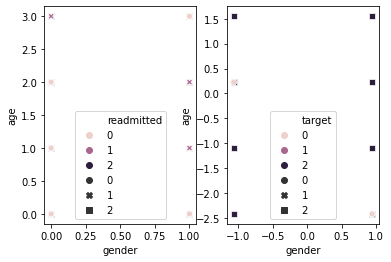

In [21]:
# Comparing original classes and Kmeans algo Classes
fig, (ax1 ,ax2) = plot.subplots(1,2)

ax1 = plot.subplot(1,2,1)
plot.title = ("Original Classes")
sns.scatterplot(x="gender", y = "age" , hue = "readmitted", style = "readmitted",data = df , ax = ax1)

ax2 = plot.subplot(1,2,2)
plot.title = ("Predicted Classes")
sns.scatterplot(x="gender", y = "age" ,hue = "target", style = "target",data = X_std_df_k , ax = ax2)

In [22]:
print("original data classes:")
print(df.readmitted.value_counts())
print("-"*40)
print("predicted classes:")
print(X_std_df_k.target.value_counts())

original data classes:
0    42982
1    22240
2     6293
Name: readmitted, dtype: int64
----------------------------------------
predicted classes:
2    50747
0    16308
1     4460
Name: target, dtype: int64


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(df.readmitted,X_std_df_k.target)

array([[10661,  2923, 29398],
       [ 4454,  1108, 16678],
       [ 1193,   429,  4671]], dtype=int64)

In [20]:
#### K Means SUCKS

In [113]:
pca_df = X_std_df.iloc[:,:-40]
pca_df.shape

(71515, 60)

In [114]:
pca_df.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'number_of_revisit',
       'critical_visits', 'num_med_change', 'admission_source_id_4',
       'admission_source_id_7', 'admission_source_id_9',
       'admission_source_id_17', 'admission_type_id_3', 'admission_type_id_5',
       'diag_1_1.0', 'diag_1_2.0', 'diag_1_3.0', 'diag_1_4.0', 'diag_1_5.0',
       'diag_1_6.0', 'diag_1_7.0', 'diag_1_8.0', 'diag_1_9.0', 'diag_1_10.0',
       'diag_1_11.0', 'dia

In [115]:
# KMeans clustering
kmeans = KMeans(n_clusters = 3,random_state = 1)

# Training the model
clusters = kmeans.fit_predict(pca_df)

# Adding a label feature with predicted class values:
pca_df_k = pca_df.copy(deep = True)
pca_df_k["target"] = clusters

<AxesSubplot:xlabel='gender', ylabel='age'>

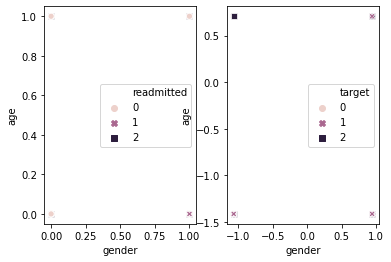

In [116]:
# Comparing original classes and Kmeans algo Classes
fig, (ax1 ,ax2) = plot.subplots(1,2)

ax1 = plot.subplot(1,2,1)
plot.title = ("Original Classes")
sns.scatterplot(x="gender", y = "age" , hue = "readmitted", style = "readmitted",data = df , ax = ax1)

ax2 = plot.subplot(1,2,2)
plot.title = ("Predicted Classes")
sns.scatterplot(x="gender", y = "age" ,hue = "target", style = "target",data = pca_df_k , ax = ax2)

In [117]:
print("original data classes:")
print(df.readmitted.value_counts())
print("-"*40)
print("predicted classes:")
print(pca_df_k.target.value_counts())

original data classes:
0    42982
1    22240
2     6293
Name: readmitted, dtype: int64
----------------------------------------
predicted classes:
2    38376
1    27481
0     5658
Name: target, dtype: int64


In [138]:
import sklearn
sklearn.metrics.accuracy_score(df.readmitted,pca_df_k.target)

0.2122351954135496

<AxesSubplot:xlabel='target', ylabel='count'>

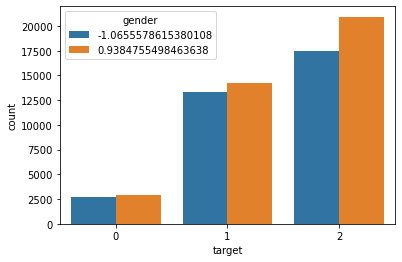

In [128]:
sns.countplot(pca_df_k.target,hue = pca_df_k.gender)

<AxesSubplot:xlabel='readmitted', ylabel='count'>

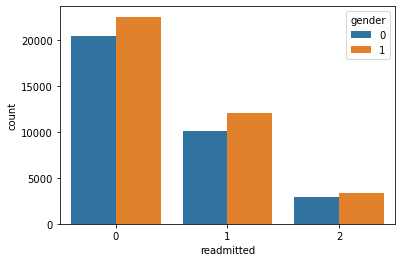

In [130]:
sns.countplot(df.readmitted,hue = df.gender)

In [139]:
# Check the target column
# the cluster notation for 0 and 2 is differnet
# Actually interchange them and then check the score